In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf  # Statsmodels is a Python module for statistics

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

from ISLP import load_data    # ISLP library for the book, it has built in functions and methods to build models 
from ISLP.models import (ModelSpec as MS, summarize , poly) # It also has built-in data that can be loaded

import matplotlib as mpl


#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'


sns.set(style="white") # Plot parameters defined globally
plt.style.use("seaborn-v0_8-white")

## 14) Collinearity problem 

### a) 

### $$ Y  = 2 + 2 X_1 + 0.3 X_2 + \epsilon $$

In [3]:
rng = np.random.default_rng(10)

x1 = rng.uniform(0,1, size = 100)

x2 = 0.5 * x1 + rng.normal(size = 100) / 10

y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size = 100)

### b) 

In [4]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})

np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

Text(0, 0.5, '$x_2$')

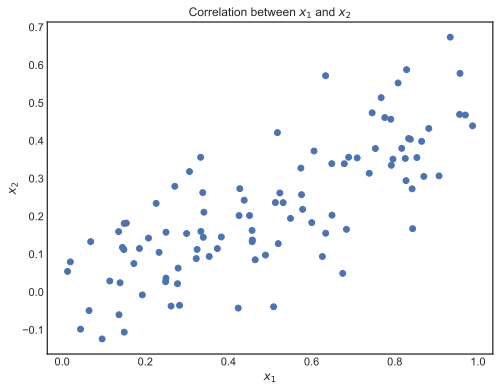

In [7]:
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(x1,x2)

ax.set_title('Correlation between $x_1$ and $x_2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### c) 

In [8]:
mlr_fit = smf.ols(formula = 'y ~ x1 + x2', data=df).fit()

print(mlr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           5.76e-08
Time:                        22:33:43   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

### Coefficient estimates somewhat differs from the true coefficients, especially for $\beta_2$ (and $\beta_1$). p-value for the coefficient of $x_1$ is still small $p < 0.05$ so we can reject the null hypothesis, $\beta_ 1 = 0$. However the p-value for $\beta_2$ is high and so we can not reject the null hypotesis: there is no significant relation between $x_2$ and $y$.

### d) and e) 

In [10]:
mlr_fit_simp1 = smf.ols(formula = 'y ~ x1', data=df).fit()
mlr_fit_simp2 = smf.ols(formula = 'y ~ x2', data=df).fit()

In [11]:
print(mlr_fit_simp1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.37e-08
Time:                        22:35:26   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.0

In [12]:
print(mlr_fit_simp2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.43e-07
Time:                        22:35:32   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.0

### Fitting seperately individual predictors tells us that both predictors are related to the target, as their p values are very small. Therefore, based on the simple linear regression fits for each individual predictor, we can reject the null hypothesis. 

### f) At face value the results are in conflict in the sense that each individual predictor seem to have some influence on the target, however when combined, one of them becomes insignificant for determining the response. This is a typical phenomenon that arise when two variables have collinearity which is what we generated by construction. When both predictors are included in the model, one of them loses its significance because the variance it explains can be attributed to the other. 

### g) 

In [13]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

new_obs = {'x1': .1, 'x2': .8, 'y': 6}
df = df.append(new_obs, ignore_index=True)

df.tail()

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_54719/2207778456.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_obs, ignore_index=True)


,x1,x2,y
96,0.790513,0.456659,3.460998
97,0.531602,0.236308,3.355095
98,0.013037,0.054343,2.336922
99,0.019875,0.079619,4.566538
100,0.100000,0.800000,6.000000


In [14]:
mlr_fitno = smf.ols(formula = 'y ~ x1 + x2', data=df).fit()

print(mlr_fitno.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.60e-08
Time:                        22:37:27   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.0

### As compared to the model in c) coefficient of the $x_2$ becomes larger and becomes statistically more robust whereas the coefficient for the predictor $x_1$ is reduced and so does its relevance for the response. We can not anymore reject the null hypothesis for $\beta_1 = 0$ while we can reject $\beta_2 = 0$. $R^2$ increased a little bit.  

In [15]:
mlr_fit_simp1no = smf.ols(formula = 'y ~ x1', data=df).fit()

print(mlr_fit_simp1no.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.23e-07
Time:                        22:38:27   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.0

### As compared to the model in d), not much change in the statistical relevance of the predictor. only $R^2$ is decreased  

In [16]:
mlr_fit_simp2no = smf.ols(formula = 'y ~ x2', data=df).fit()


print(mlr_fit_simp2no.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.13e-08
Time:                        22:38:50   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.0

### As compared to the model in e), not much change in the statistical relevance of the predictor. only $R^2$ is increased  

Text(0, 0.5, '$x_2$')

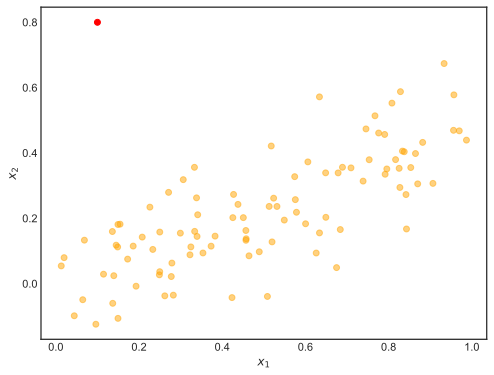

In [17]:
fig, axes = plt.subplots(figsize = (8,6))

axes.scatter(x = 'x1', y = 'x2', data = df[:-1], color = 'orange', alpha = 0.5)
axes.scatter(x = 'x1', y = 'x2', data = df[-1:], color = 'red', alpha = 1.)

axes.set_xlabel('$x_1$')
axes.set_ylabel('$x_2$')

### In terms of the predictors, new observation is far away from the other observations, signaling a possible leverage point. 

Text(0, 0.5, '$y$')

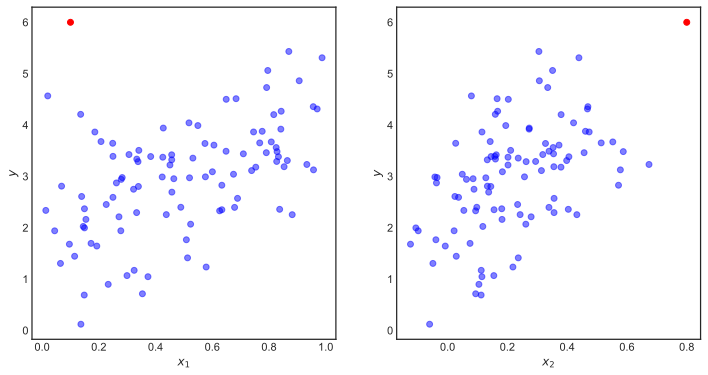

In [18]:
fig, axes = plt.subplots(1,2,figsize = (12,6))

axes[0].scatter(x = 'x1', y = 'y', data = df[:-1], color = 'blue', alpha = 0.5)
axes[0].scatter(x = 'x1', y = 'y', data = df[-1:], color = 'red', alpha = 1.)

axes[1].scatter(x = 'x2', y = 'y', data = df[:-1], color = 'blue', alpha = 0.5)
axes[1].scatter(x = 'x2', y = 'y', data = df[-1:], color = 'red', alpha = 1.)

axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$y$')

axes[1].set_xlabel('$x_2$')
axes[1].set_ylabel('$y$')

### The left plot tells us that the new observations is an outlier: it does not have an unusual $x_1$ value but have an unusual $y$ value. On the other hand, on the right hand side we see that new observation follows roughly a trend in the $x_2$ vs $y$ axis, it is likely that it is not an outlier but a high leverage point as the red point is seperated from the usual $x_2$ values. 

### To summarize, the new observation is a high leverage point in terms of the predictor $x_2$ which in turn actually increases the relevance of this term in the regression model, by making it more relevant. On the other hand, it is also potentially an outlier. We can get more precise results studying the leverage vs residual statistics.

In [19]:
stud_resid_no = mlr_fitno.get_influence().resid_studentized_internal

leverage_no = mlr_fitno.get_influence().hat_matrix_diag

cooks_no = mlr_fitno.get_influence().cooks_distance

In [20]:
top_five_cooks_no = np.flip(np.argsort(cooks_no[0]),0)[:5] 

In [21]:
top_five_cooks_no # indexes of top 5 observations with the highest influence to the fit, we see that the new observation has the largest influence 

array([100,  99,  36,  32,  15])

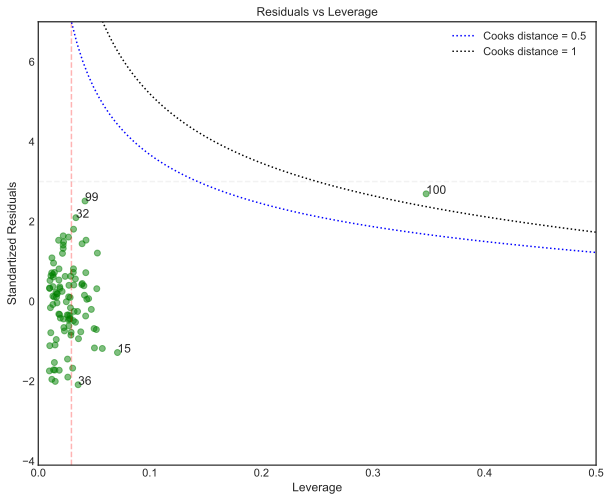

In [22]:
fig, axes = plt.subplots(1,1,figsize = (10,8))

axes.set_xlim(0, 0.5)
axes.set_ylim(-4.1, 7)
axes.set_title('Residuals vs Leverage')
axes.set_xlabel('Leverage')
axes.set_ylabel('Standartized Residuals')

for obs in top_five_cooks_no:
    axes.annotate(obs, xy = (leverage_no[obs],stud_resid_no[obs]))

p = len(mlr_fitno.params) - 1 # number of predictors 
n = len(df) # number of observations 
axes.axvline((p+1)/n, linestyle = 'dashed', color = 'red', alpha = 0.3) # average leverage of all the observations 

axes.axhline(3, linestyle = 'dashed', color = 'gray', alpha = 0.1) # app. threshold for being an outlier  

# Cooks distance = 0.5 plot in the leverage vs residuals plane 
x = np.linspace(0.01,0.5,100)

def cooks_dy(l,d):
    return np.sqrt((p+1) * d * (1-l)/l)

axes.plot(x, cooks_dy(x, d = 0.5), label = 'Cooks distance = 0.5', ls = ':' , color = 'blue')
axes.plot(x, cooks_dy(x, d = 1), label = 'Cooks distance = 1', ls = ':' , color = 'black')
axes.legend(loc = 'best')

axes.scatter(leverage_no,stud_resid_no, alpha = 0.5, color = 'green')

### Based on the plot above, we see that 100th observation point (red point in the earlier plots) has less than almost equal to 3 studentized residual which may not allow us to confidently conclude that it is an outlier. Howerver, its high leverage is crystal clear, as well as the significant impact it makes on the regression fit as its location is above the contour line of cooks distance = 1. 

### These results highlights the fact that when collinearity in the data exist, high leverage points can influence the quality of the fit

## **References**

### It turns out that in R, plotting diagnostic plots to test the performence of linear regression procedure is much easier. I followed the link below to generate plots similar to the main text for diagnosis of heteroskasdicity, outliers, leverage points and nonlinearity. 

- https://emredjan.medium.com/emulating-r-regression-plots-in-python-43741952c034

### Cooks distance: 

- https://en.wikipedia.org/wiki/Cook%27s_distance

### Introduction to Statistical Learning with Python: 

- [Introduction to Statistical Learning with Python](https://www.statlearning.com/). 